# Exploratory Data Analysis

***Import neccessary libraries***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

### EDA

***Read the files***

In [2]:
data_trips = pd.read_csv('../data/processed/clean_data_trips.csv', sep=',', low_memory=False)
#data_stations = pd.read_csv('../data/processed/clean_data_stations.csv', sep=',', low_memory=False)

***Exploration and data cleaning***

In [3]:
data_trips.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4144134 entries, 0 to 4144133
Data columns (total 22 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   idDriver             2102989 non-null  object 
 1   idBike               4144134 non-null  int64  
 2   trip_minutes         4144134 non-null  float64
 3   fleet                4144134 non-null  int64  
 4   unlock_date          4144134 non-null  object 
 5   unlock_hour          4144134 non-null  object 
 6   latitude_unlock      4144134 non-null  float64
 7   longitude_unlock     4144134 non-null  float64
 8   address_unlock       3595660 non-null  object 
 9   unlocktype           4144134 non-null  object 
 10  station_unlock       4144134 non-null  int64  
 11  dock_unlock          4144134 non-null  int64  
 12  unlock_station_name  4127342 non-null  object 
 13  lock_date            0 non-null        float64
 14  lock_hour            4144134 non-null  object 
 15

-  We have 4144134 rows corresponding to an entire year of data collection with 32 columns of varied data
- There are variables with Null values ​​that indicate that some of the columns have not been identified, for example, idDriver
-  There are 21 numerical variables and 11 categorical variables


* Eliminate duplicates

In [4]:
data_trips = data_trips.drop_duplicates()
#data_stations = data_stations.drop_duplicates()

* Eliminate irrelevant information

In [5]:
data_trips.drop(['address_unlock', 'unlocktype', 'address_lock', 'locktype'], axis=1, inplace=True)

In [6]:
data_trips = data_trips.dropna(subset=['idDriver'])

In [7]:
data_trips = data_trips[data_trips["trip_minutes"] <= 120]
data_trips = data_trips[data_trips["trip_minutes"] >= 3]

In [8]:
data_trips = data_trips.dropna(subset=['unlock_station_name'])
data_trips = data_trips.dropna(subset=['lock_station_name'])

In [9]:
# Convierte 'unlock_date' a datetime
data_trips['unlock_date'] = pd.to_datetime(data_trips['unlock_date'])

# Crea un nuevo DataFrame vacío
data_trips_red = pd.DataFrame()

while len(data_trips_red) < 60000:
    # Selecciona un mes aleatorio
    mes = pd.Timestamp(random.choice(data_trips['unlock_date'])).month
    
    # Filtra las filas de 'data_trips' que pertenecen al mes seleccionado
    df_mes = data_trips[data_trips['unlock_date'].dt.month == mes]
    
    # Calcula el porcentaje de datos que se deben tomar del mes
    porcentaje = min(1, 60000 / len(df_mes))
    
    # Toma una muestra aleatoria de 'df_mes'
    df_muestra = df_mes.sample(frac=porcentaje)
    
    # Agrega la muestra al nuevo DataFrame
    data_trips_red = pd.concat([data_trips_red, df_muestra], ignore_index=True)

# Ordena el nuevo DataFrame por 'unlock_date'
data_trips_red = data_trips_red.sort_values('unlock_date')



In [11]:
data_trips_red.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 60000 entries, 58456 to 7431
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   idDriver             60000 non-null  object        
 1   idBike               60000 non-null  int64         
 2   trip_minutes         60000 non-null  float64       
 3   fleet                60000 non-null  int64         
 4   unlock_date          60000 non-null  datetime64[ns]
 5   unlock_hour          60000 non-null  object        
 6   latitude_unlock      60000 non-null  float64       
 7   longitude_unlock     60000 non-null  float64       
 8   station_unlock       60000 non-null  int64         
 9   dock_unlock          60000 non-null  int64         
 10  unlock_station_name  60000 non-null  object        
 11  lock_date            0 non-null      float64       
 12  lock_hour            60000 non-null  object        
 13  latitude_lock        60000 non-nu

*** ¡Hay una incongruencia en la relación de los dos datsets en los números de las estaciones!. El nombre coincide, pero los números hay varios que varian, puesto que en data_trips empiezan por 1=Puerta de Sol A y en data_stations con 1A directamente ***

***Analysis of univariate variables***

* Analysis on categorical variables

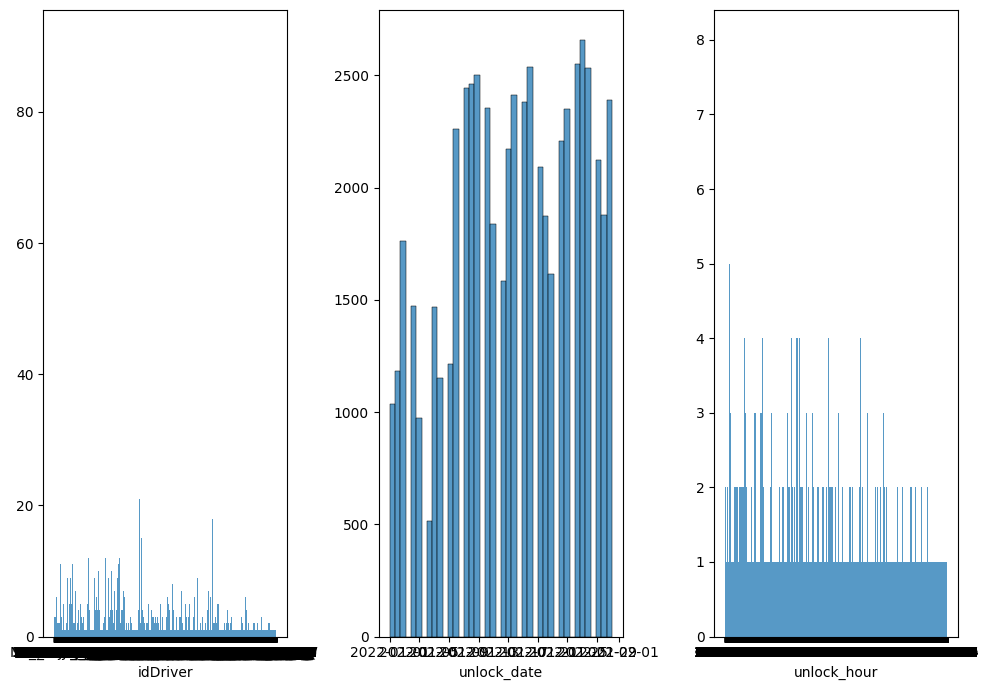

In [13]:
fig, axis = plt.subplots(1, 3, figsize = (10, 7))

sns.histplot(ax = axis[0], data = data_trips_red, x = "idDriver").set(ylabel = None)
sns.histplot(ax = axis[1], data = data_trips_red, x = "unlock_date").set(ylabel = None)
sns.histplot(ax = axis[2], data = data_trips_red, x = "unlock_hour").set(ylabel = None)

plt.tight_layout()
plt.show()

* Analysis on numeric variables

In [ ]:
# Set the style for visualizations
sns.set(style="whitegrid")

# Visualize the distribution of trip_minutes
plt.figure(figsize=(12, 6))
sns.histplot(trips_data['trip_minutes'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

# Select all numeric variables, excluding 'trip_minutes'
numeric_variables = ['fleet', 'latitude_unlock', 'longitude_unlock',
                     'station_unlock', 'dock_unlock', 'lock_date',
                     'latitude_lock', 'longitude_lock', 'station_lock', 'dock_lock']

# Create a pairplot for the numeric variables
sns.pairplot(trips_data, x_vars=numeric_variables,
             y_vars='trip_minutes', kind='scatter', height=5)
plt.suptitle('Relationship between Trip Duration and Other Numeric Variables', y=1.02)
plt.show()

# Numerical Variables in the trips_data Dataset

✅trip_minutes (float64):

Represents the duration of the bike trip in minutes.
Continuous variable measuring the time taken for a trip.

✅fleet (int64):

Refers to the fleet associated with a bike trip.
Categorical numerical variable identifying the fleet.

✅latitude_unlock (float64):

Denotes the latitude coordinate where the bike was unlocked.
Continuous variable representing the geographical location.

✅longitude_unlock (float64):

Represents the longitude coordinate where the bike was unlocked.
Continuous variable providing the geographical information.

✅station_unlock (int64):

Indicates the station ID where the bike was unlocked.
Categorical numerical variable identifying the station.

✅dock_unlock (int64):

Specifies the dock ID within the unlocking station.
Categorical numerical variable identifying the specific dock.

✅latitude_lock (float64):

Denotes the latitude coordinate where the bike was locked.
Continuous variable representing the geographical location.

✅longitude_lock (float64):

Represents the longitude coordinate where the bike was locked.
Continuous variable providing the geographical information.

✅station_lock (int64):

Indicates the station ID where the bike was locked.
Categorical numerical variable identifying the station.

✅dock_lock (int64):

Specifies the dock ID within the locking station.
Categorical numerical variable identifying the specific dock.

In [ ]:
# Set the style for visualizations
sns.set(style="whitegrid")

# Visualize the distribution of categorical variables
categorical_columns = ['idDriver', 'unlock_hour', 'unlock_station_name', 'lock_hour', 'lock_station_name']

# Count plot for idDriver
plt.figure(figsize=(12, 6))
sns.countplot(x='idDriver', data=trips_data, order=trips_data['idDriver'].value_counts().index, palette='viridis')
plt.title('Distribution of idDriver')
plt.xlabel('idDriver')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Count plot for unlock_hour
plt.figure(figsize=(12, 6))
sns.countplot(x='unlock_hour', data=trips_data, order=trips_data['unlock_hour'].value_counts().index, palette='viridis')
plt.title('Distribution of Unlock Hour')
plt.xlabel('Unlock Hour')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Count plot for unlock_station_name
plt.figure(figsize=(16, 6))
sns.countplot(x='unlock_station_name', data=trips_data, order=trips_data['unlock_station_name'].value_counts().index, palette='viridis')
plt.title('Distribution of Unlock Station Name')
plt.xlabel('Unlock Station Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Count plot for lock_hour
plt.figure(figsize=(12, 6))
sns.countplot(x='lock_hour', data=trips_data, order=trips_data['lock_hour'].value_counts().index, palette='viridis')
plt.title('Distribution of Lock Hour')
plt.xlabel('Lock Hour')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Count plot for lock_station_name
plt.figure(figsize=(16, 6))
sns.countplot(x='lock_station_name', data=trips_data, order=trips_data['lock_station_name'].value_counts().index, palette='viridis')
plt.title('Distribution of Lock Station Name')
plt.xlabel('Lock Station Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Categorical Variables in the trips_data Dataset

The trips_data dataset includes several categorical variables, which provide information in non-numeric formats. Here's a summary of the categorical variables in the dataset:

☪️idDriver (object):

Represents the unique identifier for the driver associated with the bike trip.
Categorical variable identifying individual drivers.

☪️unlock_hour (object):

Denotes the hour at which the bike was unlocked.
Categorical variable representing the time of day.

☪️unlock_station_name (object):

Indicates the name or identifier of the station where the bike was unlocked.
Categorical variable identifying the station.

☪️lock_hour (object):

Denotes the hour at which the bike was locked.
Categorical variable representing the time of day.

☪️lock_station_name (object):

Indicates the name or identifier of the station where the bike was locked.

Categorical variable identifying the station.

These categorical variables provide additional context and details about the bike trips, including driver information, unlock and lock times, and station identifiers. 

# Correlation Matrix

In [ ]:
# Visualize the correlation between numerical variables
numerical_columns = ['trip_minutes', 'fleet', 'latitude_unlock', 'longitude_unlock',
                     'station_unlock', 'dock_unlock', 'latitude_lock', 'longitude_lock',
                     'station_lock', 'dock_lock']

correlation_matrix = trips_data[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

***Analysis of multivariate variables***

Moving on to multivariable analysis in Exploratory Data Analysis (EDA) allows you to explore relationships between multiple variables simultaneously.

* Numerical-numerical analysis

In [ ]:
# Numerical-Numerical Analysis
fig, axis = plt.subplots(2, 2, figsize=(10, 7))

# Create a multiple scatter plot for "trip_minutes" and other numeric variables
sns.regplot(ax=axis[0, 0], data=trips_data, x="fleet", y="trip_minutes")
sns.regplot(ax=axis[0, 1], data=trips_data, x="latitude_unlock", y="trip_minutes")
sns.regplot(ax=axis[1, 0], data=trips_data, x="longitude_unlock", y="trip_minutes")
sns.regplot(ax=axis[1, 1], data=trips_data, x="station_unlock", y="trip_minutes")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

* Categorical-categorical analysis

In [ ]:

fig, axis = plt.subplots(2, 3, figsize=(15, 7))

sns.countplot(ax=axis[0, 0], data=trips_data, x="idDriver")
sns.countplot(ax=axis[0, 1], data=trips_data, x="unlock_hour")
sns.countplot(ax=axis[0, 2], data=trips_data, x="unlock_station_name").set(ylabel=None)
sns.countplot(ax=axis[1, 0], data=trips_data, x="lock_hour")
sns.countplot(ax=axis[1, 1], data=trips_data, x="lock_station_name").set(ylabel=None)

# Ajust layout
plt.tight_layout()

# Delete last axis (unused)
fig.delaxes(axis[1, 2])

# Show plot
plt.show()

* Combinations of class with various predictors

In [ ]:
# Combinations of trip_minutes with various predictors
fig, axis = plt.subplots(figsize=(15, 5), ncols=4)

# Bar plot for trip_minutes with idDriver
sns.barplot(ax=axis[0], data=trips_data, x="idDriver", y="trip_minutes")
axis[0].set_title("Trip Duration vs idDriver")

# Bar plot for trip_minutes with latitude_unlock
sns.barplot(ax=axis[1], data=trips_data, x="latitude_unlock", y="trip_minutes")
axis[1].set_title("Trip Duration vs Latitude Unlock")

# Bar plot for trip_minutes with longitude_unlock
sns.barplot(ax=axis[2], data=trips_data, x="longitude_unlock", y="trip_minutes")
axis[2].set_title("Trip Duration vs Longitude Unlock")

# Bar plot for trip_minutes with idBike
sns.barplot(ax=axis[3], data=trips_data, x="idBike", y="trip_minutes")
axis[3].set_title("Trip Duration vs idBike")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

* Correlation analysis

In [ ]:
# Factorize categorical variables
trips_data_factorized = trips_data.copy()
for column in ['idDriver', 'unlock_hour', 'unlock_station_name', 'lock_hour', 'lock_station_name']:
    trips_data_factorized[column + '_n'] = pd.factorize(trips_data[column])[0]

# Set up the matplotlib figure
fig, axis = plt.subplots(figsize=(18, 15))

# Create a heatmap of the correlation matrix
sns.heatmap(trips_data_factorized.corr(), annot=True, cmap="coolwarm", fmt=".2f")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


* Numerical-categorical analysis (complete)

In [ ]:
# Set up the matplotlib figure
fig, axis = plt.subplots(figsize=(12, 8))

# Create a heatmap of the correlation matrix between numerical and factorized categorical variables
sns.heatmap(trips_data_factorized[["trip_minutes", "idBike", "fleet", "latitude_unlock", "longitude_unlock", "station_unlock", "dock_unlock", "latitude_lock", "longitude_lock", "station_lock", "dock_lock", "idDriver_n", "unlock_hour_n", "unlock_station_name_n", "lock_hour_n", "lock_station_name_n"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


***Feature engineering*** -> Sigue Rubén

* Outlier analysis -> Solo graficar (no se esperan outliers)

* Missing value analysis -> No se esperan MV

* Inference of new features -> Investigar: Trip Distance: You can calculate the distance covered during each trip based on the latitude and longitude information at unlock and lock times. This could provide insights into the length of the trips.

Trip Speed: By combining the trip distance with the trip duration (trip_minutes), you can calculate the average speed of each trip. This might be an interesting feature to explore.

Trip Day of the Week: Extracting the day of the week from the unlock_date can provide information about whether trip patterns vary on specific days.

Trip Duration Category: Create categories for short, medium, and long trips based on the trip_minutes to identify different types of trips.

Station Activity: Count the number of unlocks and locks at each station to understand the activity level of different stations.

Time of Day Category: Categorize the unlock and lock times into different time periods (morning, afternoon, evening, night) to analyze if trip characteristics vary throughout the day.

Travel Direction: Determine the compass direction (North, South, East, West) of each trip based on the latitude and longitude information to understand the general direction of travel.

Lock-Unlock Time Gap: Calculate the time gap between consecutive locks and unlocks to identify patterns in bike usage frequency.

* Feature scaling -> Juan

* Normalization / Mix-Max Scaling -> Juan

***Feature selection*** -> Juan

***Save the interim data*** -> JuanL

In [ ]:
'''# Creamos una función para proceder a la limpieza y adecuación del conjunto de datos 
def limpieza_datos (trips_data):
  # Eliminamos las entradas de los viajes que han durado más de 2h
  trips_data = trips_data[trips_data["trip_minutes"] <= 120]
  # Eliminamos las entradas de los viajes que han durado menos de 3 minutos
  trips_data = trips_data[trips_data["trip_minutes"] >= 3]
  # Eliminamos los números de las estaciones
  trips_data['unlock_station_name'] = trips_data['unlock_station_name'].str.replace('\d+\s*\-\s*', '')
  trips_data['lock_station_name'] = trips_data['lock_station_name'].str.replace('\d+\s*\-\s*', '')
  # Eliminamos los registros en los que el formato de fecha se encuentre mal introducido
  trips_data['unlock_date'] = pd.to_datetime(trips_data['unlock_date'], format='%Y-%m-%dT%H:%M:%S', errors='coerce')
  trips_data = trips_data.dropna(subset=['unlock_date'])
  # Devolvemos la tabla de datos
  return trips_data
  '''